In [3]:
%load_ext autoreload
%autoreload 2

import os
import torch
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer, seed_everything
os.chdir("/nfs/homedirs/schwienb/project-4")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from src.data.mnist import MNISTDataModule, ConstantDataset, RandomDataset
from src.data.fashionmnist import FashionMNISTDataModule
from src.models.pixelcnn import PixelCNN
from src.experiments.experiment import Experiment


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
seed_everything(42)

42

In [6]:
early_stop_callback = EarlyStopping(
   monitor='val_loss',
   min_delta=0.0000,
   patience=3,
   verbose=True,
)

EarlyStopping mode set to min for monitoring val_loss.


In [7]:
mnist_exp = Experiment(PixelCNN, MNISTDataModule, "PixelCNN_MNIST_1.3", callbacks=[early_stop_callback])


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [8]:
# mnist_exp.trainer.fit(mnist_exp.model, mnist_exp.dataset)

In [9]:
mnist_exp.load()

In [8]:
# mnist_exp.save()

In [11]:
fashmnist_exp = Experiment(PixelCNN, FashionMNISTDataModule, "PixelCNN_FASHIONMNIST_1", callbacks=[early_stop_callback])


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [12]:
# fashmnist_exp.trainer.fit(fashmnist_exp.model, fashmnist_exp.dataset)

In [13]:
fashmnist_exp.load()

In [14]:
# fashmnist_exp.save()

In [15]:
mnist_testdataloader = mnist_exp.dataset.test_dataloader()
fashionmnist_testdataloader = fashmnist_exp.dataset.test_dataloader()
constant_testdataloader = DataLoader(ConstantDataset(), batch_size=1, shuffle=False, drop_last=True, pin_memory=True)
random_testdataloader = DataLoader(RandomDataset(), batch_size=1, shuffle=False, drop_last=True, pin_memory=True)
test_dataloaders = [mnist_testdataloader, fashionmnist_testdataloader, constant_testdataloader, random_testdataloader]

In [16]:
mnist_exp.model.eval()
mnist_test_mnist = mnist_exp.trainer.test(mnist_exp.model, test_dataloaders=[mnist_testdataloader], verbose=False)

Set SLURM handle signals.


/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The testing_epoch_end should not return anything as of 9.1.to log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)


In [19]:
mnist_test_fashion = mnist_exp.trainer.test(mnist_exp.model, test_dataloaders=[fashionmnist_testdataloader], verbose=False)

Set SLURM handle signals.


In [20]:
mnist_test_constant = mnist_exp.trainer.test(mnist_exp.model, test_dataloaders=[constant_testdataloader], verbose=False)

Set SLURM handle signals.
/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


In [21]:
mnist_test_random = mnist_exp.trainer.test(mnist_exp.model, test_dataloaders=[random_testdataloader], verbose=False)

Set SLURM handle signals.


In [22]:
constant2_testdataloader = DataLoader(ConstantDataset(value=1), batch_size=1, shuffle=False, drop_last=True, pin_memory=True)
mnist_test_constant2 = mnist_exp.trainer.test(mnist_exp.model, test_dataloaders=[constant2_testdataloader], verbose=False)

Set SLURM handle signals.


In [23]:
losses = torch.Tensor(mnist_test_mnist[1]['loss']).numpy()
fashionlosses = torch.Tensor(mnist_test_fashion[1]['loss']).numpy()
constantlosses = torch.Tensor(mnist_test_constant[1]['loss']).numpy()
constantlosses2 = torch.Tensor(mnist_test_constant2[1]['loss']).numpy()
randomlosses = torch.Tensor(mnist_test_random[1]['loss']).numpy()

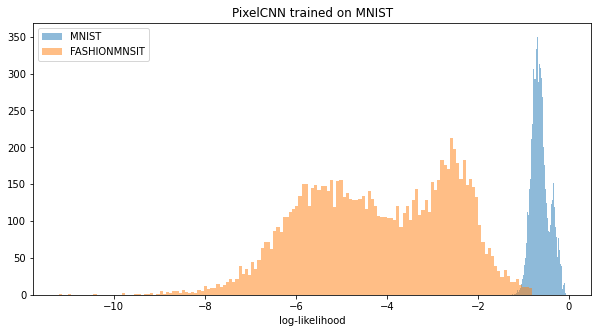

In [32]:
plt.figure(figsize=(10,5))

plt.hist(losses * -1, 100, alpha=0.5, label='MNIST')
plt.hist(fashionlosses * -1, 150, alpha=0.5, label='FASHIONMNSIT')
# plt.hist(constantlosses * -1, 10, alpha=0.5, label='CONSTANT BLACK')
# plt.hist(constantlosses2 * -1, 10, alpha=0.5, label='CONSTANT WHITE')
# plt.hist(randomlosses * -1, 100, alpha=0.5, label='RANDOM')
plt.legend(loc='upper left')
plt.xlabel('log-likelihood')
plt.title('PixelCNN trained on MNIST')
plt.show()

In [12]:
fashionmnist_test_mnist = fashmnist_exp.trainer.test(fashmnist_exp.model, test_dataloaders=[mnist_testdataloader], verbose=False)
fashionmnist_test_fashion = fashmnist_exp.trainer.test(fashmnist_exp.model, test_dataloaders=[fashionmnist_testdataloader], verbose=False)
fashionmnist_test_constant = fashmnist_exp.trainer.test(fashmnist_exp.model, test_dataloaders=[constant_testdataloader], verbose=False)
fashionmnist_test_random = fashmnist_exp.trainer.test(fashmnist_exp.model, test_dataloaders=[random_testdataloader], verbose=False)
fashionmnist_test_constant2 = fashmnist_exp.trainer.test(fashmnist_exp.model, test_dataloaders=[constant_testdataloader], verbose=False)

Set SLURM handle signals.


/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The testing_epoch_end should not return anything as of 9.1.to log, use self.log(...) or self.write(...) directly in the LightningModule
  warnings.warn(*args, **kwargs)
Set SLURM handle signals.


Set SLURM handle signals.


/nfs/students/winter-term-2020/project-4/schwienb/conda/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:45: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Set SLURM handle signals.


Set SLURM handle signals.


In [13]:
fashionmnist_losses = torch.Tensor(fashionmnist_test_mnist[1]['loss']).numpy()
fashionmnist_fashionlosses = torch.Tensor(fashionmnist_test_fashion[1]['loss']).numpy()
fashionmnist_constantlosses = torch.Tensor(fashionmnist_test_constant[1]['loss']).numpy()
fashionmnist_constantlosses2 = torch.Tensor(fashionmnist_test_constant2[1]['loss']).numpy()
fashionmnist_randomlosses = torch.Tensor(fashionmnist_test_random[1]['loss']).numpy()

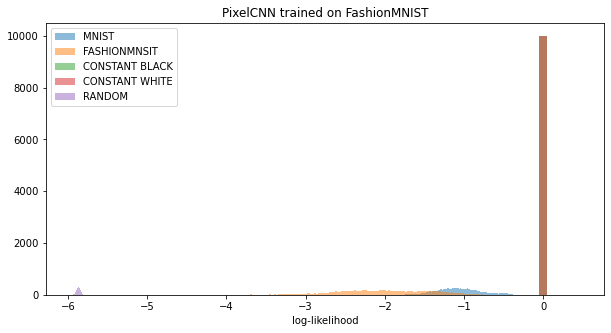

In [19]:
plt.figure(figsize=(10,5))
plt.hist(fashionmnist_losses * -1, 100, alpha=0.5, label='MNIST')
plt.hist(fashionmnist_fashionlosses * -1, 150, alpha=0.5, label='FASHIONMNSIT')
plt.hist(fashionmnist_constantlosses * -1, 10, alpha=0.5, label='CONSTANT BLACK')
plt.hist(fashionmnist_constantlosses2 * -1, 10, alpha=0.5, label='CONSTANT WHITE')
plt.hist(fashionmnist_randomlosses * -1, 100, alpha=0.5, label='RANDOM')
plt.legend(loc='upper left')
plt.xlabel('log-likelihood')
plt.title('PixelCNN trained on FashionMNIST')
plt.show()

In [44]:
from torch.autograd import Variable
import torch.nn.functional as F

In [46]:
def generate_images(model):
    sample = torch.Tensor(144, 1, 28, 28).cuda()
    
    model.cuda()
    sample.fill_(0)
    model.train(False)
    for i in range(28):
        for j in range(28):
            out = model(Variable(sample))
            probs = F.softmax(out[:, :, i, j]).data
            sample[:, :, i, j] = torch.multinomial(probs, 1).float() / 255.
    
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))

    columns = 12
    rows = 12
    for i in range(1, columns*rows +1):
        if i < 144:
            fig.add_subplot(rows, columns, i)
            plt.imshow(sample.detach().cpu().numpy()[i][0], cmap='gray')
            plt.xticks([])
            plt.yticks([])
    plt.show()
    

<ipython-input-46-0523c828f498>:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(out[:, :, i, j]).data


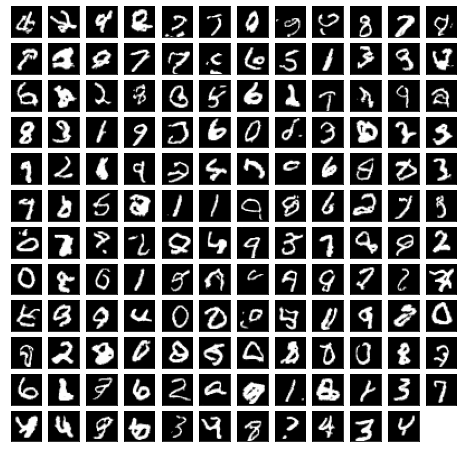

In [47]:
generate_images(mnist_exp.model)

<ipython-input-46-0523c828f498>:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = F.softmax(out[:, :, i, j]).data


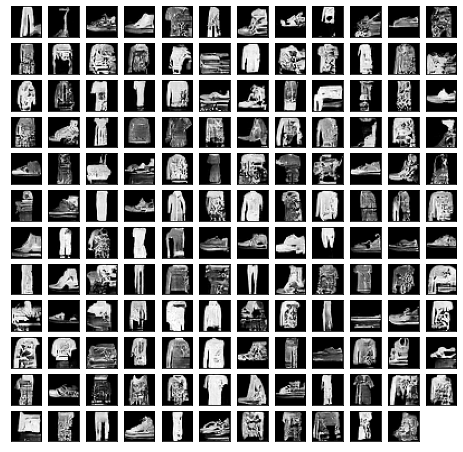

In [49]:
generate_images(fashmnist_exp.model)